<a href="https://colab.research.google.com/github/IndraLukasTjahaja/Python201_Modeling/blob/master/Application_Scorecard_with_German_Credit_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Persiapan Google Colaboratory dan Downloading dataset

Karena data tersedia di website tjahaja, maka kita dapat langsung run dari Google Colab

# Bab III: Metodologi Data Science CRISP-DM dengan Score Card 

In [ ]:
## III.2.1 Persiapan data dan impor ke Python

# library panda untuk menggunakan data frame
import pandas as pd

# Pengaturan folder tempat data / Google Colab

# Impor data dari excel xls ke Python
df = pd.read_excel('https://tjahaja.com/wp-content/uploads/2021/01/german_credit-simple.xlsx')
# Alternative
print("read datafile")

read datafile


In [ ]:
df['installment_as_income_perc'] = df.installment_as_income_perc.astype('category')
df['present_res_since'] = df.present_res_since.astype('category')
df['people_under_maintenance'] = df.people_under_maintenance.astype('category')
df['credits_this_bank'] = df.credits_this_bank.astype('category')

In [ ]:
## III.2.2 Penjelasan untuk setiap variabel di dataset

df.dtypes

ID                              object
default                          int64
account_check_status            object
duration_in_month                int64
credit_history                  object
purpose                         object
credit_amount                    int64
savings                         object
present_emp_since               object
installment_as_income_perc    category
personal_status_sex             object
other_debtors                   object
present_res_since             category
property                        object
age                              int64
other_installment_plans         object
housing                         object
credits_this_bank             category
job                             object
people_under_maintenance      category
telephone                       object
foreign_worker                  object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          1000 non-null   object  
 1   default                     1000 non-null   int64   
 2   account_check_status        1000 non-null   object  
 3   duration_in_month           1000 non-null   int64   
 4   credit_history              1000 non-null   object  
 5   purpose                     1000 non-null   object  
 6   credit_amount               1000 non-null   int64   
 7   savings                     1000 non-null   object  
 8   present_emp_since           1000 non-null   object  
 9   installment_as_income_perc  1000 non-null   category
 10  personal_status_sex         1000 non-null   object  
 11  other_debtors               1000 non-null   object  
 12  present_res_since           1000 non-null   category
 13  property           

In [ ]:
## III.2.4 Eksplorasi data untuk memeriksa hasil hipotesis

# Untuk melihat frekuensi dari variabel default

print(df['default'].value_counts())


0    700
1    300
Name: default, dtype: int64


In [ ]:
# Untuk melihat frekuensi dari variabel credit_history
print(df['credit_history'].value_counts())

existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly                         49
no credits taken/ all credits paid back duly                    40
Name: credit_history, dtype: int64


In [ ]:
# Untuk melihat proporsi dari variabel credit_history
print(df['credit_history'].value_counts(normalize=True) * 100)

existing credits paid back duly till now                       53.0
critical account/ other credits existing (not at this bank)    29.3
delay in paying off in the past                                 8.8
all credits at this bank paid back duly                         4.9
no credits taken/ all credits paid back duly                    4.0
Name: credit_history, dtype: float64


In [ ]:
# Untuk melihat proporsi dari variabel credit_history
# atau
print(df['credit_history'].value_counts() / len(df['credit_history']) * 100)

existing credits paid back duly till now                       53.0
critical account/ other credits existing (not at this bank)    29.3
delay in paying off in the past                                 8.8
all credits at this bank paid back duly                         4.9
no credits taken/ all credits paid back duly                    4.0
Name: credit_history, dtype: float64


In [ ]:
# Melihat kaitan antara variabel credit_history dengan default (gagal bayar)
print(pd.crosstab(df['credit_history'], df['default']))

default                                               0    1
credit_history                                              
all credits at this bank paid back duly              21   28
critical account/ other credits existing (not a...  243   50
delay in paying off in the past                      60   28
existing credits paid back duly till now            361  169
no credits taken/ all credits paid back duly         15   25


In [ ]:
# Melihat proporsi kaitan antara variabel credit_history dengan default (gagal bayar)
print(pd.crosstab(df['credit_history'], df['default'], normalize='index') * 100)

default                                                     0          1
credit_history                                                          
all credits at this bank paid back duly             42.857143  57.142857
critical account/ other credits existing (not a...  82.935154  17.064846
delay in paying off in the past                     68.181818  31.818182
existing credits paid back duly till now            68.113208  31.886792
no credits taken/ all credits paid back duly        37.500000  62.500000


In [ ]:
# Rangkuman statistik untuk variabel numerik
print(df['age'].describe())

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64


In [ ]:
# Rangkuman statistik untuk variabel numerik Age, berdasarkan default (gagal bayar atau tidak)
df.groupby('default')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,700.0,36.224286,11.381145,19.0,27.0,34.0,42.25,75.0
1,300.0,33.963333,11.222379,19.0,25.0,31.0,40.00,74.0


In [ ]:
# Menghitung korelasi antara variabel Age dengan default
print(df['default'].corr(df['age']))

-0.09112740931949893


In [ ]:
# Uji coba hipotesis apakah ada perbedaan nilai rata-rata variabel Age dengan default (gagal bayar dan tidak gagal bayar)
from scipy import stats
stats.ttest_ind( df[df.default == 0].age,
                 df[df.default == 1].age, nan_policy='omit')

Ttest_indResult(statistic=2.890846677564194, pvalue=0.003925339398276282)

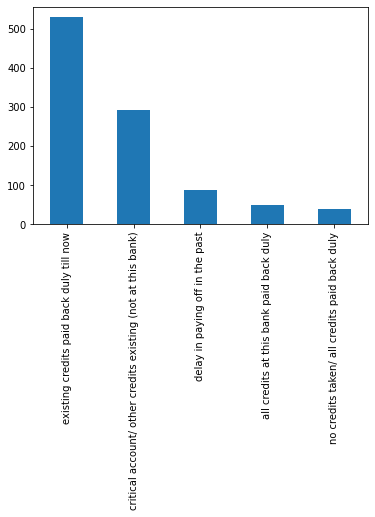

In [ ]:
## III.2.5.1 Distribusi data untuk variabel tipe karakter

# Fungsi value_counts().plot(kind='bar')
df['credit_history'].value_counts().plot(kind='bar') 

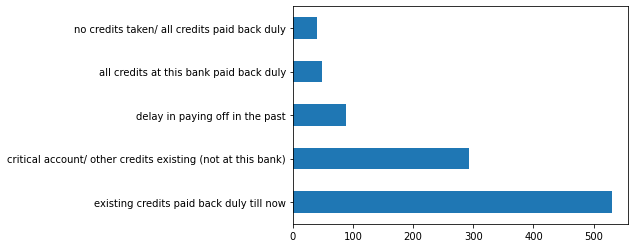

In [ ]:
# Karena nama dari isi variabel credit_history panjang, mari kita tampilkan bar secara horizontal
df['credit_history'].value_counts().plot(kind='barh') 

In [ ]:

# atau
# Dengan menggunakan fungsi yang sama, menampilkan proporsi
# df['credit_history'].value_counts(normalize=True).plot(kind='bar') 


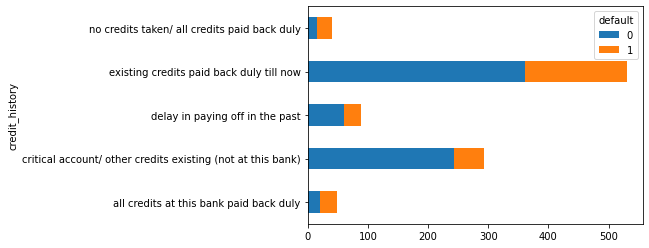

In [ ]:
# Nilai variabel credit_history dan proporsi default secara plot bar
pd.crosstab(df['credit_history'], df['default']).plot(kind='barh', stacked=True)

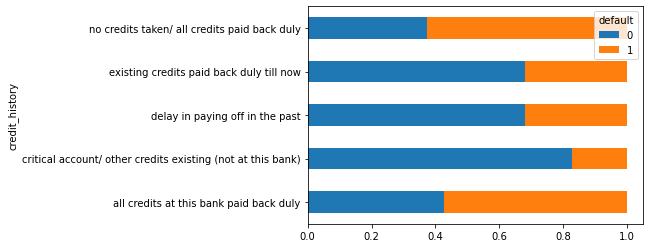

In [ ]:
# Nilai variabel credit_history dan proporsi default secara plot bar, secara proporsi
pd.crosstab(df['credit_history'], df['default'], normalize='index').plot(kind='barh', stacked=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

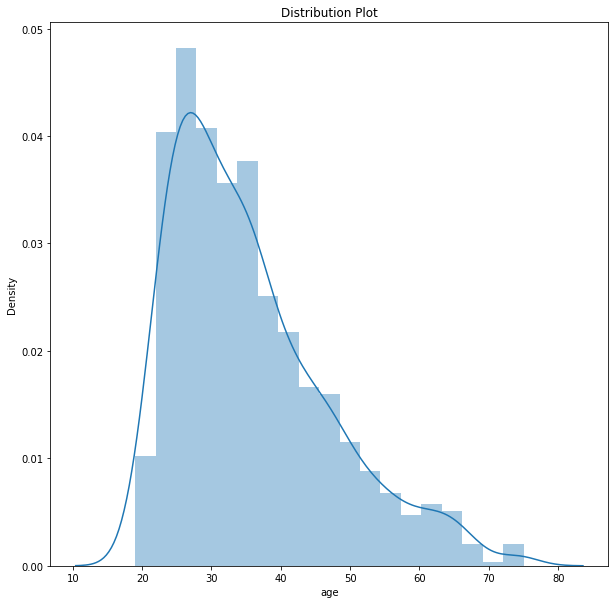

In [ ]:
## III.2.5.2 Distribusi data untuk variabel tipe numerik

# Fungsi distplot() dari library seaborn
# Perhatikan bahwa distribusi plot harus tidak memiliki data kosong / missing value.
# Oleh karena itu harus menambahkan fungsi dropna() untuk secara sementara tidak
# mengikutsertakan missing value dalam pembuatan plot distribusi 

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df['age'].dropna(), ax=ax).set_title('Distribution Plot') 

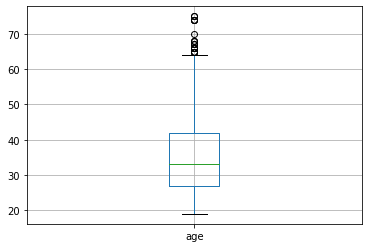

In [ ]:
df.boxplot(column=['age'])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


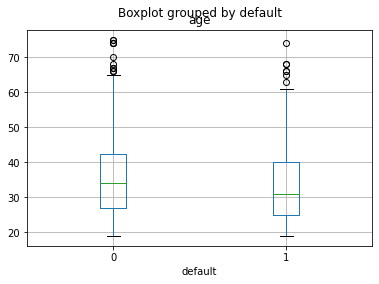

In [ ]:
# Menambahkan by di fungsi boxplot
df.boxplot(by='default',column=['age'])

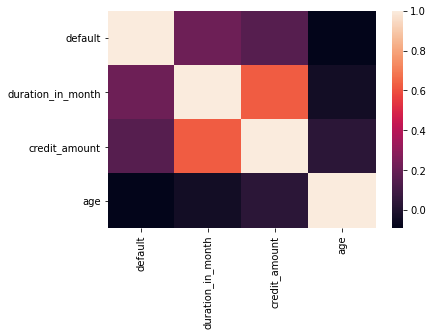

In [ ]:
## III.2.6 Korelasi Antar Variabel

import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [ ]:
## III.3.1 Penanganan untuk data yang hilang (missing values)

# Membuat kopi dari df dan menyimpan sebagai df_prepare
df_prepare = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          1000 non-null   object  
 1   default                     1000 non-null   int64   
 2   account_check_status        1000 non-null   object  
 3   duration_in_month           1000 non-null   int64   
 4   credit_history              1000 non-null   object  
 5   purpose                     1000 non-null   object  
 6   credit_amount               1000 non-null   int64   
 7   savings                     1000 non-null   object  
 8   present_emp_since           1000 non-null   object  
 9   installment_as_income_perc  1000 non-null   category
 10  personal_status_sex         1000 non-null   object  
 11  other_debtors               1000 non-null   object  
 12  present_res_since           1000 non-null   category
 13  property           

In [ ]:
df_prepare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          1000 non-null   object  
 1   default                     1000 non-null   int64   
 2   account_check_status        1000 non-null   object  
 3   duration_in_month           1000 non-null   int64   
 4   credit_history              1000 non-null   object  
 5   purpose                     1000 non-null   object  
 6   credit_amount               1000 non-null   int64   
 7   savings                     1000 non-null   object  
 8   present_emp_since           1000 non-null   object  
 9   installment_as_income_perc  1000 non-null   category
 10  personal_status_sex         1000 non-null   object  
 11  other_debtors               1000 non-null   object  
 12  present_res_since           1000 non-null   category
 13  property           

In [ ]:

# Koding berikut menggantikan missing value dari semua variabel dengan
# nilai yang paling sering muncul (modus)

for column in df_prepare.columns:
        df_prepare[column].fillna(df_prepare[column].mode()[0], inplace=True)

In [ ]:
## III.3.3 Pembuatan variabel yang baru (Feature Engineering) 

df_prepare['cicilan_per_bulan'] = df_prepare['credit_amount'] / df_prepare['duration_in_month']

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


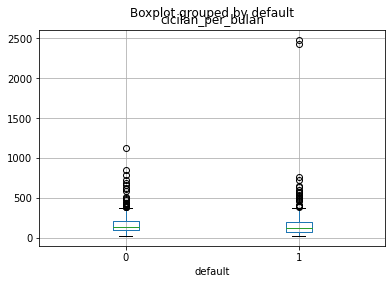

In [ ]:
# Fungsi boxplot dari variabel cicilan_per_bulan, dengan kemungkinan gagal bayar
df_prepare.boxplot(by='default',column=['cicilan_per_bulan'])

In [ ]:
# Menghitung korelasi dan uji coba hipotesis antara variabel cicilan_per_bulan dengan default

print(df_prepare['default'].corr(df_prepare['cicilan_per_bulan']))

stats.ttest_ind( df_prepare[df_prepare.default == 0].cicilan_per_bulan,
                 df_prepare[df_prepare.default == 1].cicilan_per_bulan, nan_policy='omit')

0.01859236751525831


Ttest_indResult(statistic=-0.587455591345179, pvalue=0.5570306502279705)

In [ ]:
## III.3.4 Transformasi variabel kategori menjadi numerik (One-Hot Encoding) 

# Koding untuk one hot encoding untuk semua variabel kategori

# Langkah pertama adalah membuang variabel ID karena ini adalah identifikasi nasabah
df_prepare.drop(['ID'], axis = 1, inplace = True)

# Memisahkan variabel kategori dengan variabel numerik
dataset_dummies = df_prepare.select_dtypes(exclude = ['float64','int64','int'])
dataset_int = df_prepare.select_dtypes(include=['float64','int64','int'])

# Memisahkan target/dependent variabel dari dataset dengan variabel kategori
target = df_prepare['default']
dataset_int.drop(['default'], axis = 1, inplace = True)

# Menggunakan function get_dummies dari panda untuk melakukan one hot encoding
dataset_dummies_df = pd.get_dummies(dataset_dummies,drop_first = True)
    
# Menggabungkan dataset variabel kategori dari one hot encoding dengan variabel numerik
dataset = pd.concat([dataset_dummies_df, dataset_int], axis = 1)
feature_name = dataset.columns
df_encoded = pd.concat([dataset, target], axis = 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 56 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   account_check_status_< 0 DM                                                 1000 non-null   uint8  
 1   account_check_status_>= 200 DM / salary assignments for at least 1 year     1000 non-null   uint8  
 2   account_check_status_no checking account                                    1000 non-null   uint8  
 3   credit_history_critical account/ other credits existing (not at this bank)  1000 non-null   uint8  
 4   credit_history_delay in paying off in the past                              1000 non-null   uint8  
 5   credit_history_existing credits paid back duly till now                     1000 non-null   uint8  
 6   credit_history_no credits taken/ all credits paid

,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_business,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/television,purpose_repairs,purpose_retraining,savings_... < 100 DM,savings_100 <= ... < 500 DM,savings_500 <= ... < 1000 DM,savings_unknown/ no savings account,present_emp_since_... < 1 year,present_emp_since_1 <= ... < 4 years,present_emp_since_4 <= ... < 7 years,present_emp_since_unemployed,installment_as_income_perc_2,installment_as_income_perc_3,installment_as_income_perc_4,personal_status_sex_male : divorced/separated,personal_status_sex_male : married/widowed,personal_status_sex_male : single,other_debtors_guarantor,other_debtors_none,present_res_since_2,present_res_since_3,present_res_since_4,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,credits_this_bank_2,credits_this_bank_3,credits_this_bank_4,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,people_under_maintenance_2,"telephone_yes, registered under the customers name",foreign_worker_yes,duration_in_month,credit_amount,age,cicilan_per_bulan,default
0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,6,1169,67,194.833333,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,48,5951,22,123.979167,1
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,12,2096,49,174.666667,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,42,7882,45,187.666667,0
4,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,24,4870,53,202.916667,1


In [ ]:
# Menentukan variabel dependent (default) dan independent (input untuk model)

# X sebagai semua variabel independent, input untuk model
X = df_encoded.iloc[:,0:len(df_encoded.columns)-1]

# y sebagai target atau variabel dependent
y = df_encoded.iloc[:,len(df_encoded.columns)-1]

In [ ]:
X.head()
y.head()
print(y.value_counts())

0    700
1    300
Name: default, dtype: int64


In [ ]:
# menggunakan function SMOTE untuk melakukan kombinasi oversampling/undersampling
from imblearn.over_sampling import SMOTE

# function SMOTE dengan menerapkan proporsi 50%, maka ratio harus menjadi 1.0 Karena ratio mengacu pada proporsi gagal bayar
sm = SMOTE(random_state = 42, ratio = 1.0)

# Hasil dari function SMOTE disimpan dalam variabel X dan y
X_imbal,y_imbal = sm.fit_sample(X,y.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Melihat jumlah bayar dan gagal bayar nasabah di y_imbal hasil dari SMOTE
import collections, numpy
collections.Counter(y_imbal)

Counter({0: 700, 1: 700})

In [ ]:
# Menggunakan library dan fungsi train_test_split
from sklearn.model_selection import train_test_split

# Membagi data set menjadi train dan test, dimana proporsi test adalah 0.3 / 30% dari total data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

# Membagi lagi test data set menjadi dua, dimana 15% adalah test dan 15% digunakan sebagai validasi
X_test, X_test_holdup, y_test, y_test_holdup = train_test_split(X_test, y_test, test_size =0.5, random_state=42)

# Karena X_train dalam bentuk array, tidak akan tersimpan nama variabel independen. Oleh karena itu kita akan simpan dalam bentuk list nama-nama kolom
# Akan banyak nama kolomnya
kolom_short = ["act_0DM","act_200DM/salary","act_none","cre_his_critical/other_existing","cre_his_delay","cre_his_paid","cre_his_none/paid","purpose_business","purpose_car(new)","purpose_car(used)"    ,"purpose_appli","purpose_education","purpose_furniture","purpose_radio/television","purpose_repairs","purpose_retraining","sav_100DM","sav100_500DM","sav500_1000DM","sav_unknown","emp_1year"    ,"emp_1_4years","emp_4_7years","emp_unemployed","inst_2","inst_3","inst_4","male:divorced","male:married","male:single","debtors_guarantor","debtors_none","res_2","res_3","res_4"  ,"prop_other","prop_realestate","proy_unknown","other_ins_none","other_inst_stores","hous_own","hous_rent","credits_2","credits_3","credits_4","job_employee","job_unemployed","job_unskilled"   ,"people_2","phone_yes","foreign_yes","duration_in_month","credit_amount","age","cicilan_per_bulan"]


In [ ]:
# Menggunakan scaling dengan standard scaler dari library sklearn
from sklearn.preprocessing import StandardScaler

# Memanggil fungsi standard scaler
sc = StandardScaler()

# Merubah nilai X dari Train dan Test menjadi standardisation
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)
X_test_holdup_scale = sc.fit_transform(X_test_holdup)

In [ ]:
print(X_train_scale)

[[-0.59715086 -0.25898489  1.24316312 ... -0.46293616  2.17938197
  -0.58145548]
 [-0.59715086 -0.25898489  1.24316312 ... -0.51277161  0.31188474
  -0.07879666]
 [ 1.67461871 -0.25898489 -0.80439967 ...  0.07245814  1.91259665
  -0.33082099]
 ...
 [-0.59715086 -0.25898489  1.24316312 ...  0.80719422 -0.75525653
   0.51072715]
 [-0.59715086 -0.25898489 -0.80439967 ... -0.647462   -0.93311341
  -0.31043667]
 [-0.59715086 -0.25898489  1.24316312 ... -0.83333473 -1.02204185
  -0.09037866]]


In [ ]:
## III.4. Modeling Decision Tree

# Menggunakan fungsi DecisionTree dari library sklearn
from sklearn.tree import DecisionTreeClassifier

# Fungsi Decision Tree, menggunakan opsi dasar saja
classifier = DecisionTreeClassifier()

# Melakukan model Decision Tree kepada data training
# Karena Decision Tree tidak memerlukan scaling, kita akan buat
# train dan test tanpa scaling
classifier.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

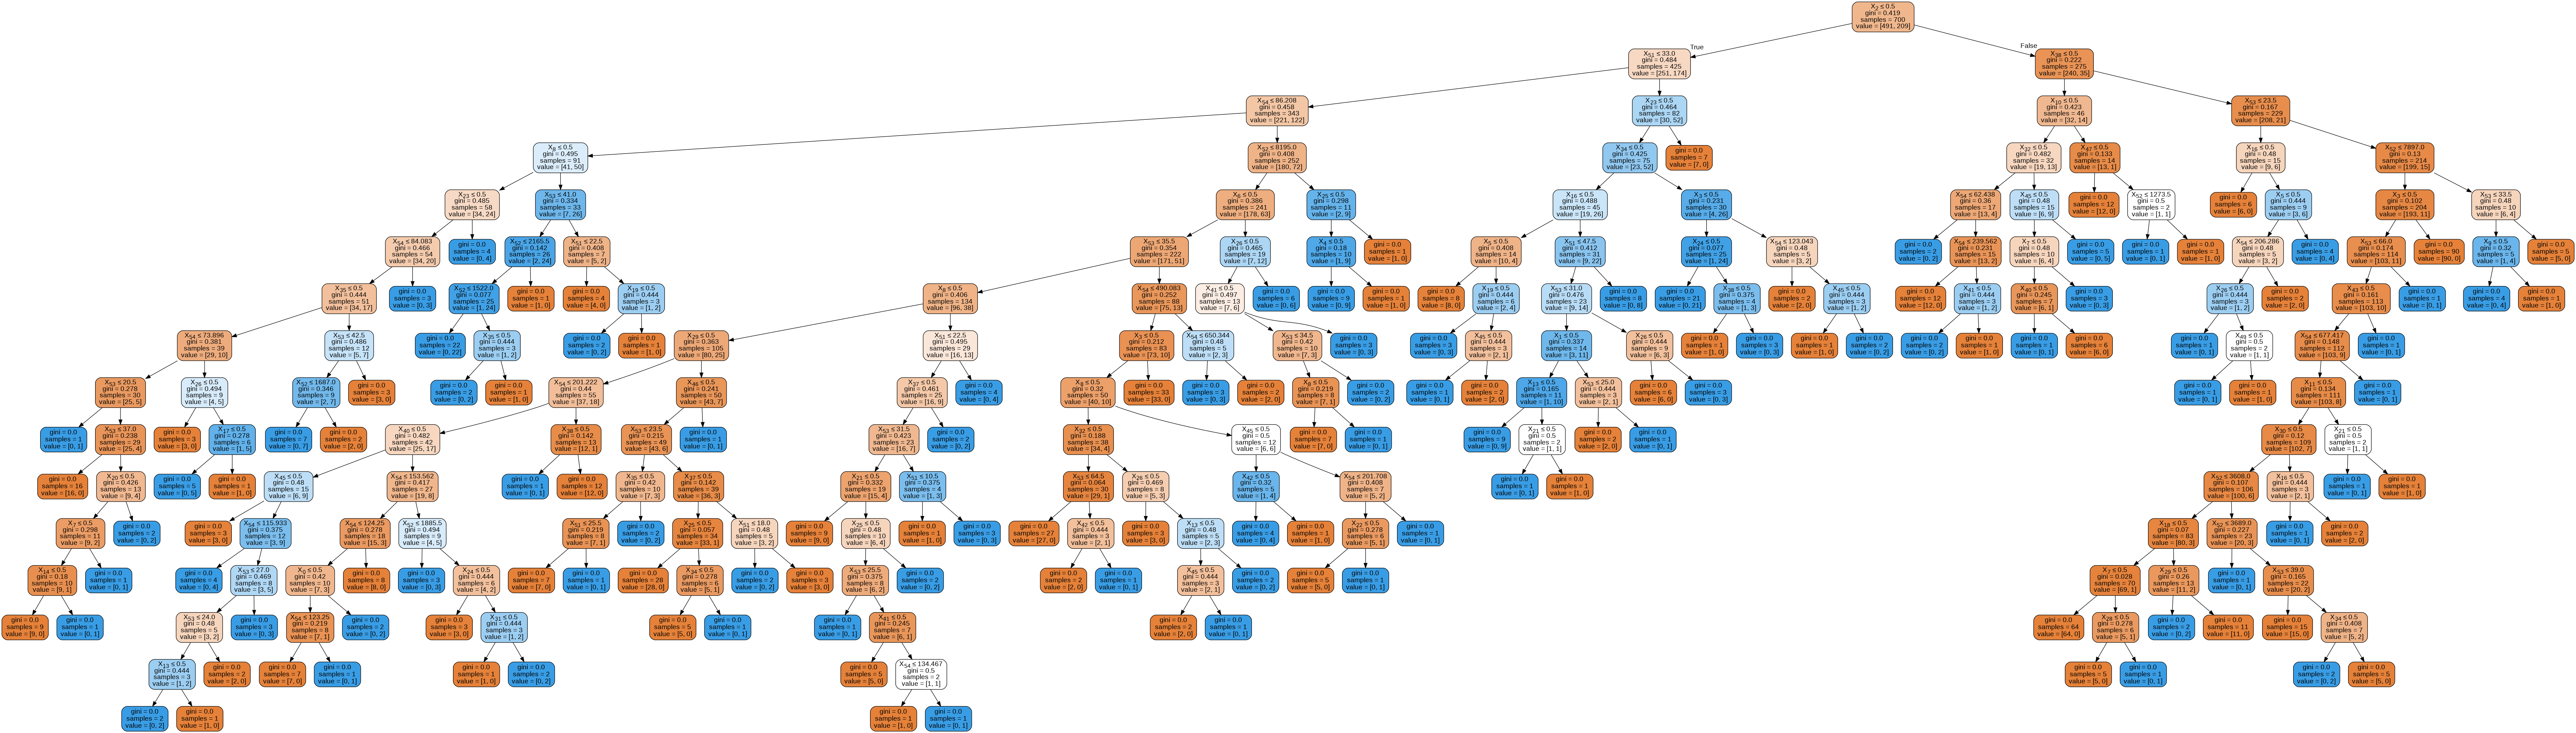

In [ ]:

import pydotplus
import graphviz

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display, Image
from sklearn.externals.six import StringIO

# Untuk dapat menggunakan graphviz memerlukan instalasi library yang tepat, silahkan refer ke website berikut untuk petunjuk instalasi:
# https://stackoverflow.com/questions/27666846/pydot-invocationexception-graphvizs-executables-not-found

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


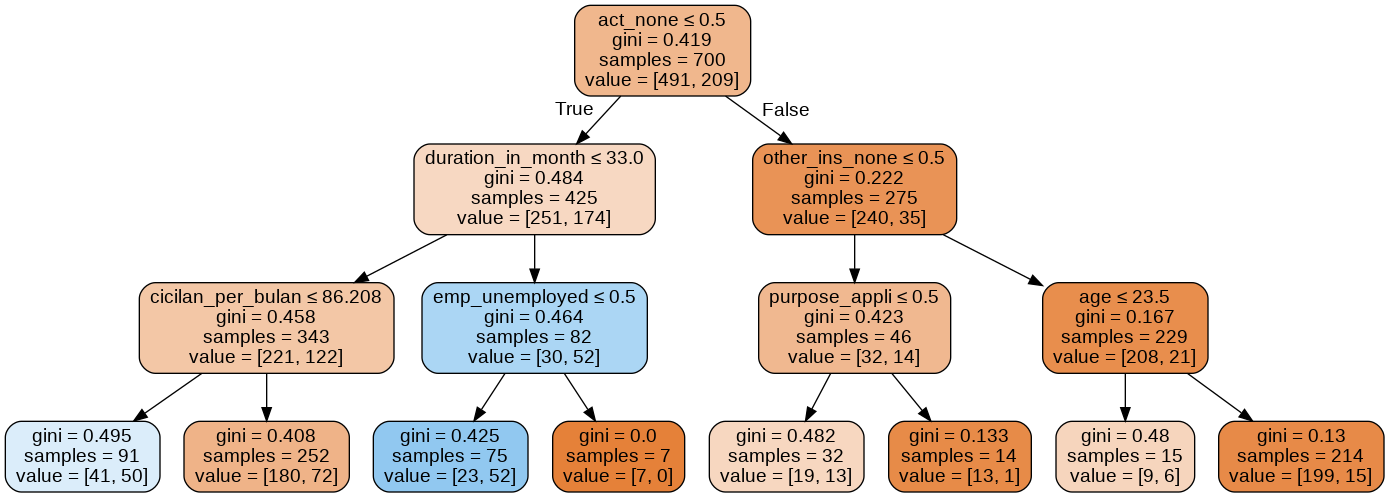

In [ ]:

# Fungsi Decision Tree, menggunakan opsi max_depth
classifier = DecisionTreeClassifier(max_depth=3)

# Melakukan model Decision Tree kepada data training
classifier.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True,rounded=True,
                special_characters=True, feature_names = kolom_short)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree_2.png')
Image(graph.create_png())


In [ ]:
## III.5.1 Implementasi model dari data Train ke data Test 


# Memprediksi data test dengan menggunakan model Decision Tree
predicted = classifier.predict(X_test)
predicted_proba = classifier.predict_proba(X_test)

# Melihat hasil dari predict ke data test
print(predicted)

# Melihat hasil dari predict probabilitas ke data test
print(predicted_proba)

[0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1
 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 1]
[[0.71428571 0.28571429]
 [0.71428571 0.28571429]
 [0.92990654 0.07009346]
 [0.71428571 0.28571429]
 [0.71428571 0.28571429]
 [0.92990654 0.07009346]
 [0.45054945 0.54945055]
 [0.71428571 0.28571429]
 [0.71428571 0.28571429]
 [0.45054945 0.54945055]
 [0.59375    0.40625   ]
 [0.71428571 0.28571429]
 [0.92990654 0.07009346]
 [0.71428571 0.28571429]
 [0.92990654 0.07009346]
 [0.45054945 0.54945055]
 [0.92990654 0.07009346]
 [0.71428571 0.28571429]
 [0.71428571 0.28571429]
 [0.92990654 0.07009346]
 [0.6        0.4       ]
 [0.71428571 0.28571429]
 [0.71428571 0.28571429]
 [0.92990654 0.07009346]
 [0.92990654 0.07009346]
 [0.59375    0.40625   ]
 [0.71428571 0.28571429]
 [0.30666667 0.6933

In [ ]:
## III.5.2 Evaluasi dengan Confusion Matrix 

# Menggunakan fungsi Confusion Matrix dari sklearn
from sklearn.metrics import confusion_matrix

# Kita akan cek hasil confusion matrix antara hasil sebenarnya dengan prediksi dari model ke data test
matrix = confusion_matrix(y_test, predicted)

# cek hasil matrix
print(matrix)


[[88 11]
 [28 23]]


In [ ]:
## III.5.3 Classification Report

# Menggunakan fungsi Classification Report dari sklearn
from sklearn.metrics import classification_report

# Kita akan cek hasil confusion matrix antara hasil sebenarnya dengan prediksi dari model ke data test
report = classification_report(y_test, predicted)

# cek hasil matrix
print(report)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        99
           1       0.68      0.45      0.54        51

    accuracy                           0.74       150
   macro avg       0.72      0.67      0.68       150
weighted avg       0.73      0.74      0.72       150



In [ ]:
# install scikitplot

!pip install -q scikit-plot

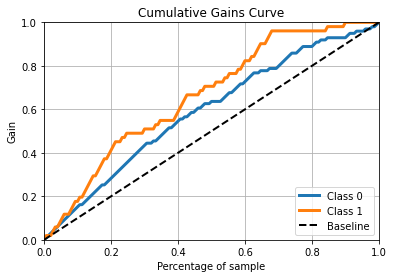

In [ ]:
## III.5.4 Gain and Lift chart 

import matplotlib.pyplot as plt
# Harap install library scikit-plot terlebih dahulu
import scikitplot as skplt

# Gain chart
skplt.metrics.plot_cumulative_gain(y_test, predicted_proba)
plt.show()

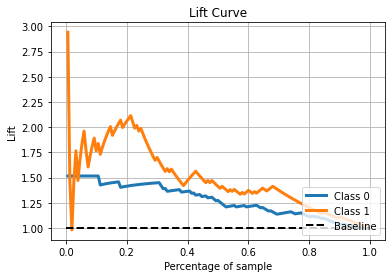

In [ ]:
# Lift chart
skplt.metrics.plot_lift_curve(y_test, predicted_proba)
plt.show()

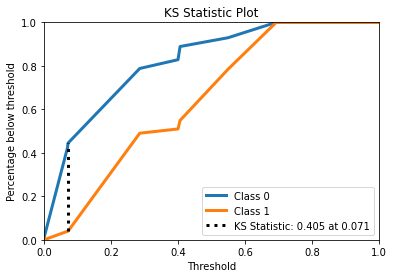

In [ ]:
# K-S chart
skplt.metrics.plot_ks_statistic(y_test, predicted_proba)
plt.show()

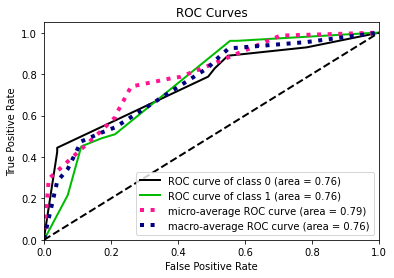

In [ ]:
# Membuat chart ROC dan menghitung AUC
skplt.metrics.plot_roc(y_test, predicted_proba)

plt.show()

# Metode dengan Logistic Regression

In [ ]:
# Model Logistic Regression

from sklearn.linear_model import LogisticRegression

# Pembuatan model logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Hasil dari model: parameter koefisien
parameters = log_reg.coef_
print(parameters)

[[ 4.78944406e-01 -1.93968098e-01 -1.10533960e+00 -7.51970337e-01
  -1.41859131e-01 -6.46126624e-02  4.37175565e-01  2.21427007e-01
   6.53929239e-01 -5.96283248e-01 -4.33266508e-01  4.15784924e-02
   2.52657087e-02 -4.03358095e-01  5.01314579e-02 -6.85097235e-02
   4.16273498e-01  1.90603813e-01 -2.09114968e-01 -2.67428267e-01
   1.59485630e-01  7.23034366e-02 -2.27687675e-01  6.05644809e-02
  -1.28120076e-01 -3.08789705e-02  5.55893525e-01  5.21804259e-02
  -4.53452669e-02 -3.98619120e-01 -2.37470871e-01  1.24613663e-01
   3.82051927e-01  8.91170737e-02 -3.17827519e-02 -7.77999505e-03
  -5.11311745e-01  4.43039249e-01 -5.69310027e-01  7.91029269e-02
  -3.99628841e-01 -8.28941857e-03  1.86812277e-01 -3.20188580e-02
   6.55377422e-02  1.07453076e-02 -3.83817024e-02 -1.02225478e-01
   1.46492144e-01 -2.33456779e-01  2.22527772e-01  2.42099001e-02
   7.79870075e-05 -2.84824914e-02]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Metode dengan Logistic Regression dengan Stats

In [ ]:
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)
result = model.fit(method='newton')

result.summary()

Optimization terminated successfully.
         Current function value: 0.447378
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      646
Method:                           MLE   Df Model:                           53
Date:                Tue, 16 Feb 2021   Pseudo R-squ.:                  0.2662
Time:                        04:09:29   Log-Likelihood:                -313.16
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 1.962e-23
==============================================================================================================================================
                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
account_check_status_< 0 DM                                                    0.2698      0.264      1.020      0.308      -0.248       0.788
account_check_status_>= 200 DM / salary assignments for at least 1 year       -0.7124      0.469     -1.518      0.129      -1.632       0.208
account_check_status_no checking account                                      -1.2922      0.277     -4.659      0.000      -1.836      -0.749
credit_history_critical account/ other credits existing (not at this bank)    -1.7167      0.525     -3.271      0.001      -2.745      -0.688
credit_history_delay in paying off in the past                                -1.3849      0.578     -2.396      0.017      -2.518      -0.252
credit_history_existing credits paid back duly till now                       -0.6456      0.459     -1.408      0.159      -1.544       0.253
credit_history_no credits taken/ all credits paid back duly                   -0.1604      0.637     -0.252      0.801      -1.408       1.087
purpose_business                                                              -0.8841      0.564     -1.567      0.117      -1.990       0.221
purpose_car (new)                                                             -0.4056      0.479     -0.846      0.398      -1.345       0.534
purpose_car (used)                                                            -2.0103      0.584     -3.441      0.001      -3.155      -0.865
purpose_domestic appliances                                                   -1.3885      0.495     -2.804      0.005      -2.359      -0.418
purpose_education                                                             -0.9771      0.769     -1.270      0.204      -2.485       0.530
purpose_furniture/equipment                                                   -1.3631      0.941     -1.449      0.147      -3.207       0.481
purpose_radio/television                                                      -1.4773      0.509     -2.902      0.004      -2.475      -0.480
purpose_repairs                                                               -0.8138      0.893     -0.911      0.362      -2.564       0.937
purpose_retraining                                                            -2.4381      1.284     -1.900      0.057      -4.954       0.078
savings_... < 100 DM                                                           1.0096      0.569      1.774      0.076      -0.106       2.125
savings_100 <= ... < 500 DM                                                    0.6709      0.636      1.054      0.292      -0.576       1.918
savings_500 <= ... < 1000 DM                                                   0.3882      0.720      0.539      0.590      -1.023       1.800
savings_unknown/ no savings account                                            0.3152      0.61

# Metode dengan Library Scorecardpy

In [ ]:
# install scorecardpy

!pip install -q scorecardpy

In [ ]:
# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# scorecardpy library sudah memiliki fungsi untuk data split, scale, dan lainnya, oleh karena itu kita akan load df_prepare saja
dat = df_prepare

In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          1000 non-null   object
 1   default                     1000 non-null   int64 
 2   account_check_status        1000 non-null   object
 3   duration_in_month           1000 non-null   int64 
 4   credit_history              1000 non-null   object
 5   purpose                     1000 non-null   object
 6   credit_amount               1000 non-null   int64 
 7   savings                     1000 non-null   object
 8   present_emp_since           1000 non-null   object
 9   installment_as_income_perc  1000 non-null   int64 
 10  personal_status_sex         1000 non-null   object
 11  other_debtors               1000 non-null   object
 12  present_res_since           1000 non-null   int64 
 13  property                    1000 non-null   objec

In [ ]:
# Filter variabel secara otomatis
# Filter otomatis variabel dari fungsi scorecard, dengan tidak mengikutsertakan variabel yang terlalu banyak missing value dan nilai minimum Information Value
dt_s = scpy.var_filter(dat, y = 'default')
dt_s.drop(['installment_as_income_perc'], axis = 1, inplace = True)

[INFO] filtering variables ...


In [ ]:
dt_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   account_check_status     1000 non-null   object
 1   housing                  1000 non-null   object
 2   personal_status_sex      1000 non-null   object
 3   age                      1000 non-null   int64 
 4   other_installment_plans  1000 non-null   object
 5   present_emp_since        1000 non-null   object
 6   property                 1000 non-null   object
 7   purpose                  1000 non-null   object
 8   credit_amount            1000 non-null   int64 
 9   savings                  1000 non-null   object
 10  credit_history           1000 non-null   object
 11  duration_in_month        1000 non-null   int64 
 12  other_debtors            1000 non-null   object
 13  default                  1000 non-null   int64 
dtypes: int64(4), object(10)
memory usage: 109

In [ ]:
# breaking dt_s menjadi training dan test dataset
train, test = scpy.split_df(dt_s, y='default').values()

# Melakukan WOE binning
bins = scpy.woebin(dt_s, y = 'default')

[INFO] creating woe binning ...


{'account_check_status': <Figure size 432x288 with 2 Axes>,
 'age': <Figure size 432x288 with 2 Axes>,
 'credit_amount': <Figure size 432x288 with 2 Axes>,
 'credit_history': <Figure size 432x288 with 2 Axes>,
 'duration_in_month': <Figure size 432x288 with 2 Axes>,
 'housing': <Figure size 432x288 with 2 Axes>,
 'other_debtors': <Figure size 432x288 with 2 Axes>,
 'other_installment_plans': <Figure size 432x288 with 2 Axes>,
 'personal_status_sex': <Figure size 432x288 with 2 Axes>,
 'present_emp_since': <Figure size 432x288 with 2 Axes>,
 'property': <Figure size 432x288 with 2 Axes>,
 'purpose': <Figure size 432x288 with 2 Axes>,
 'savings': <Figure size 432x288 with 2 Axes>}

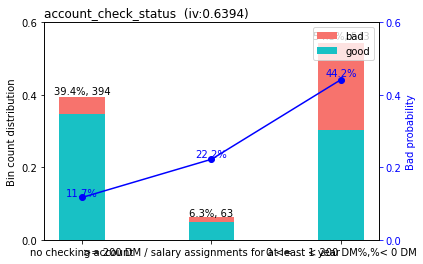

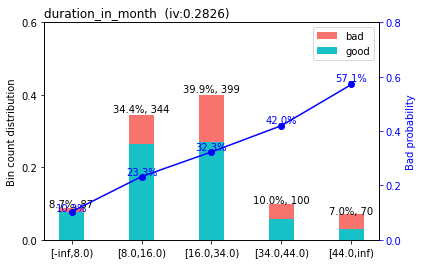

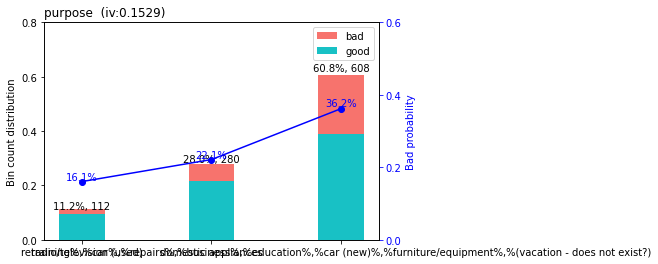

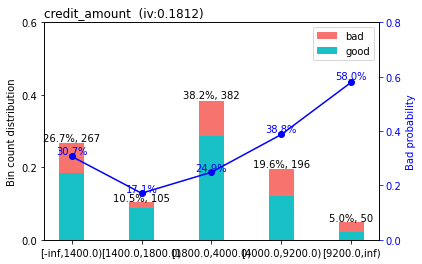

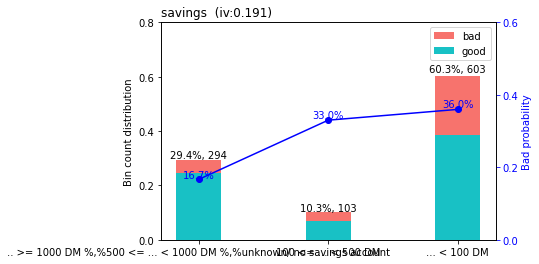

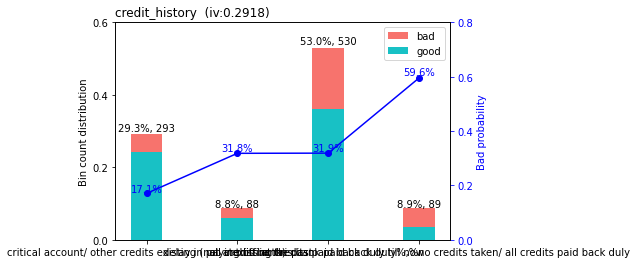

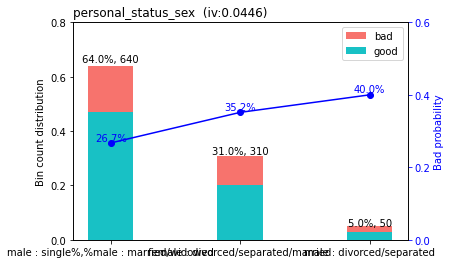

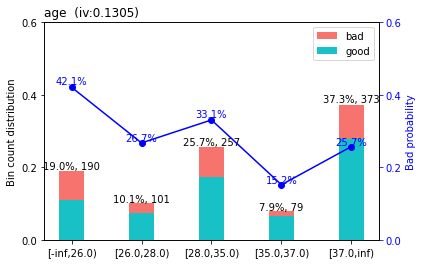

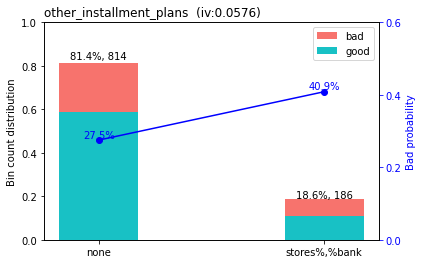

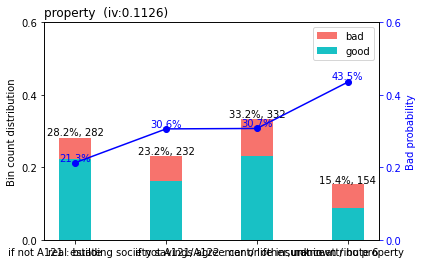

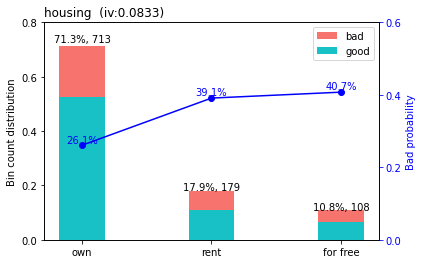

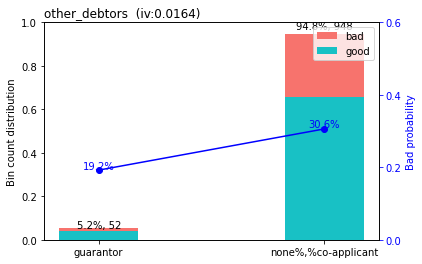

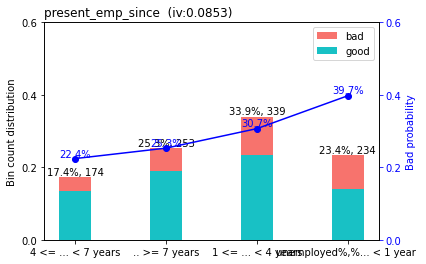

In [ ]:
# Melihat plot hasil dari WoE dan IV
scpy.woebin_plot(bins)

In [ ]:
# Hasil dari WoE dan IV secara kalkulasi
print(bins)

{'account_check_status':                variable  ... is_special_values
0  account_check_status  ...             False
1  account_check_status  ...             False
2  account_check_status  ...             False

[3 rows x 12 columns], 'duration_in_month':             variable          bin  count  ...  total_iv  breaks  is_special_values
0  duration_in_month   [-inf,8.0)     87  ...  0.282618     8.0              False
1  duration_in_month   [8.0,16.0)    344  ...  0.282618    16.0              False
2  duration_in_month  [16.0,34.0)    399  ...  0.282618    34.0              False
3  duration_in_month  [34.0,44.0)    100  ...  0.282618    44.0              False
4  duration_in_month   [44.0,inf)     70  ...  0.282618     inf              False

[5 rows x 12 columns], 'purpose':   variable  ... is_special_values
0  purpose  ...             False
1  purpose  ...             False
2  purpose  ...             False

[3 rows x 12 columns], 'credit_amount':         variable              bi

In [ ]:
# Membuat model scorecard

# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins)
test_woe = scpy.woebin_ply(test, bins)

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']
y_test = test_woe.loc[:,'default']
X_test = test_woe.loc[:,train_woe.columns != 'default']

# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

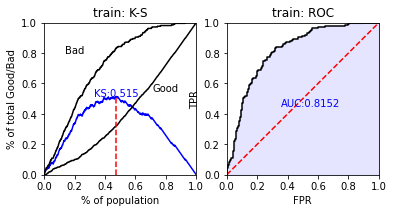

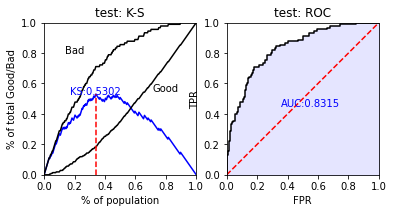

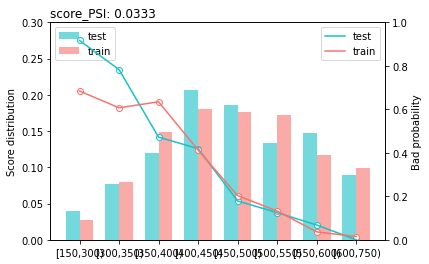

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.033252}

In [ ]:
# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins, lr, X_train.columns)
# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)